In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('retail_price.csv')

In [40]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


# Exploratory Data Analysis (EDA)
Let's explore the dataset to understand its structure, missing values, and key statistics.

In [41]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [42]:
# Basic info and summary statistics
print('Shape:', df.shape)
print(df.info())

Shape: (676, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday           

In [45]:
# Check for missing values if any
any(df.isnull().sum()>0)

False

In [26]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


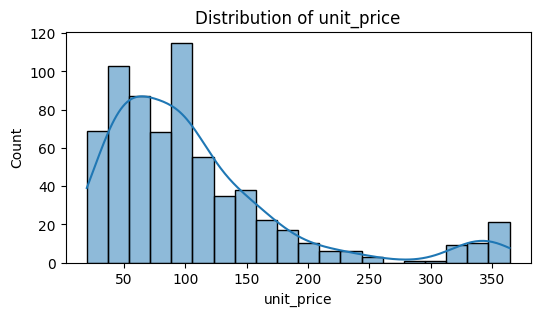

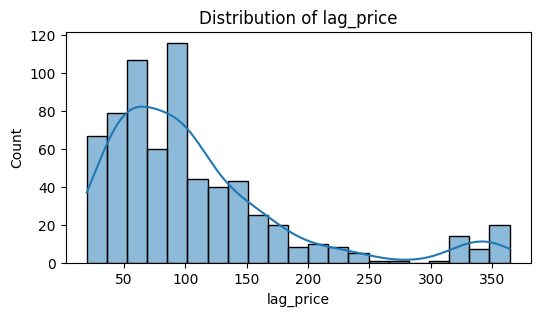

In [47]:
# Visualize distributions of unit price and lag_price
num_cols = ['unit_price', 'lag_price']
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\ansul\AppData\Local\Temp\ipykernel_37460\3268666457.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='product_category_name', y='unit_price', data=df, ci=None)


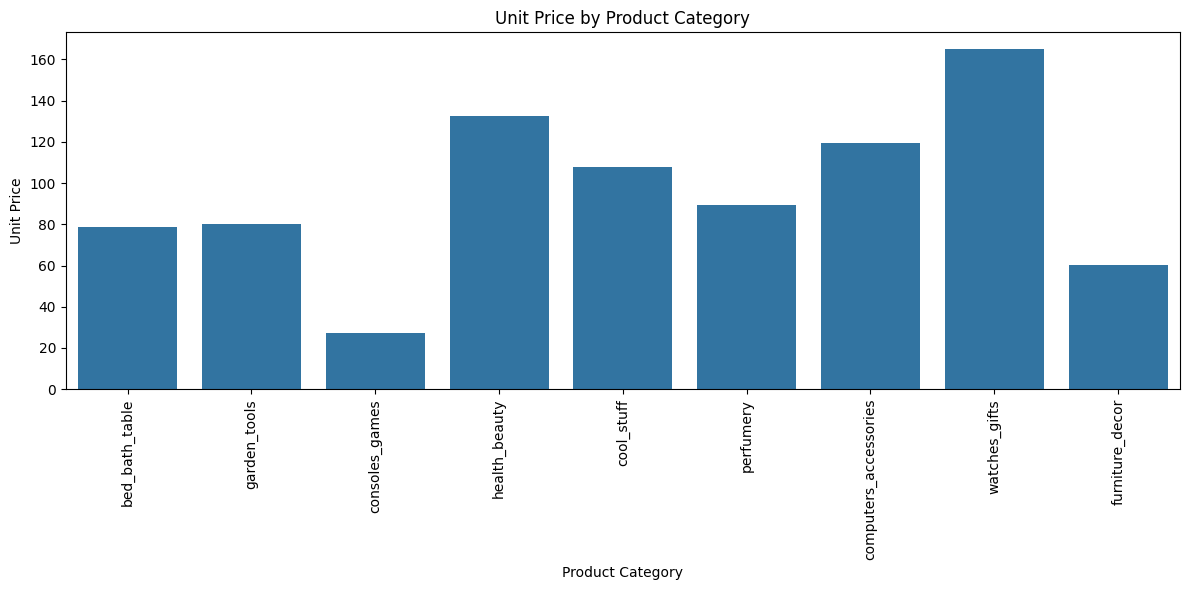

In [31]:
## plotting unit price by product category
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name', y='unit_price', data=df, ci=None)
plt.xticks(rotation=90)
plt.title('Unit Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.tight_layout()
plt.show()


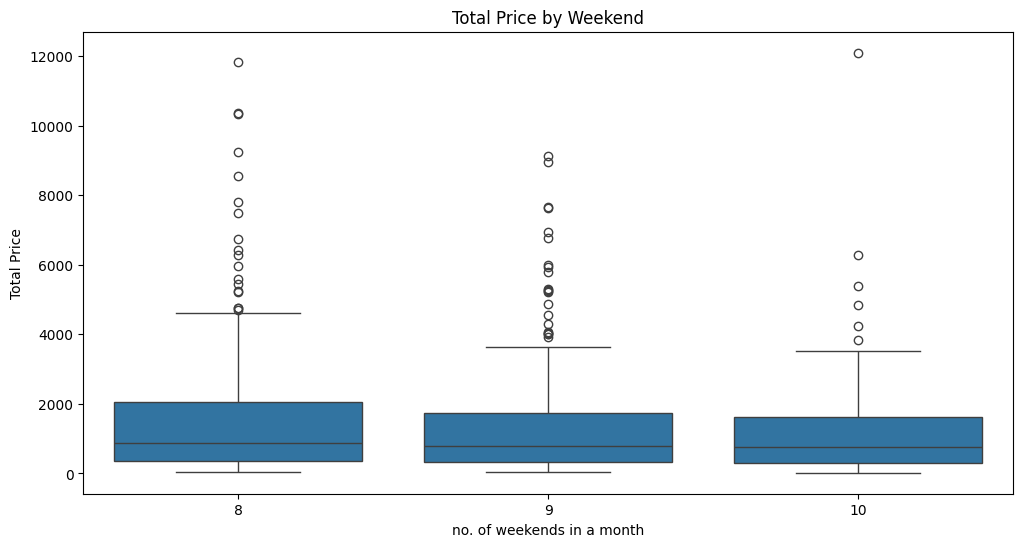

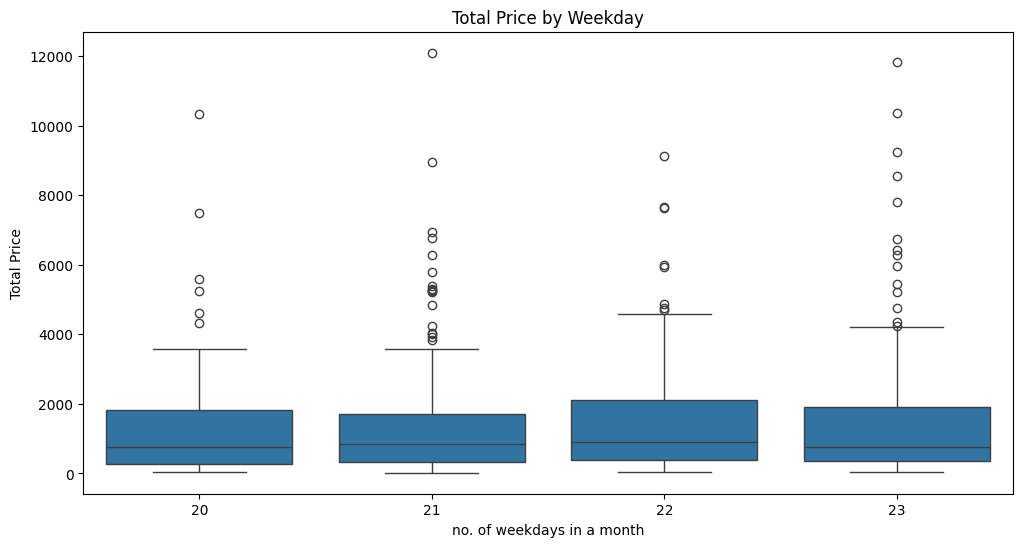

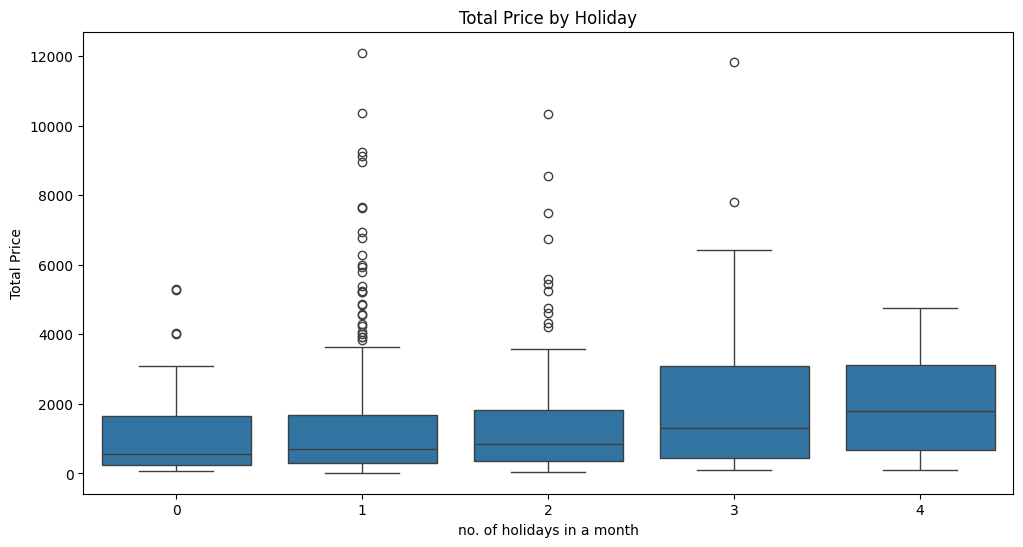

In [48]:
### Plotting total price by weekend, weekday, and holiday
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekend', y='total_price', data=df)
plt.title('Total Price by Weekend')
plt.xlabel('no. of weekends in a month')
plt.ylabel('Total Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='total_price', data=df)
plt.title('Total Price by Weekday')
plt.xlabel('no. of weekdays in a month')
plt.ylabel('Total Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday', y='total_price', data=df)
plt.title('Total Price by Holiday')
plt.xlabel('no. of holidays in a month')
plt.ylabel('Total Price')
plt.show()

High total price when more weekdays and holidays but less weekends in a month obeserved

In [ ]:
# Compare unit_price with competitor prices (comp_1, comp_2, comp_3)
comp_cols = ['comp_1', 'comp_2', 'comp_3']

# Correlation
corrs = df[['unit_price'] + comp_cols].corr()
print("Correlation matrix:\n", corrs)

Correlation matrix:
             unit_price    comp_1    comp_2    comp_3
unit_price    1.000000  0.317113  0.466459  0.383780
comp_1        0.317113  1.000000  0.532859  0.650433
comp_2        0.466459  0.532859  1.000000  0.472245
comp_3        0.383780  0.650433  0.472245  1.000000


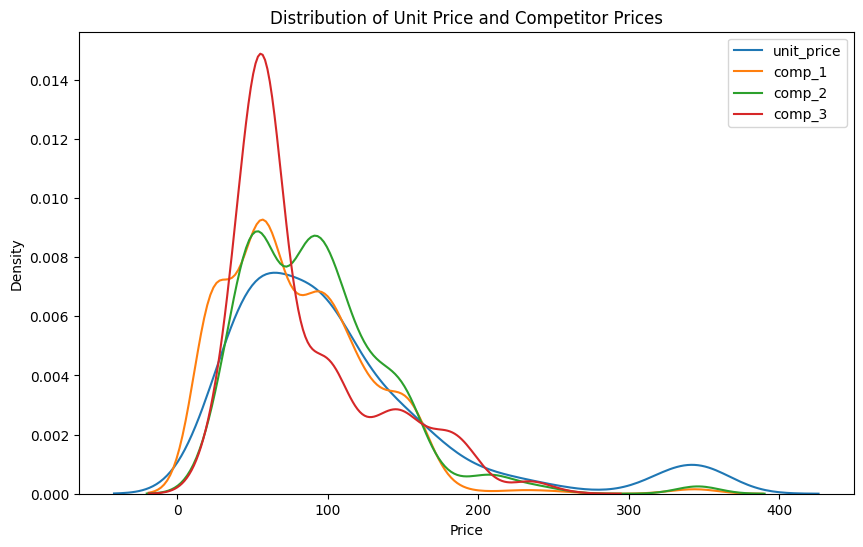

In [50]:
# 2. Distribution plots
plt.figure(figsize=(10, 6))
for col in ['unit_price'] + comp_cols:
    sns.kdeplot(df[col], label=col)
plt.title('Distribution of Unit Price and Competitor Prices')
plt.xlabel('Price')
plt.legend()
plt.show()

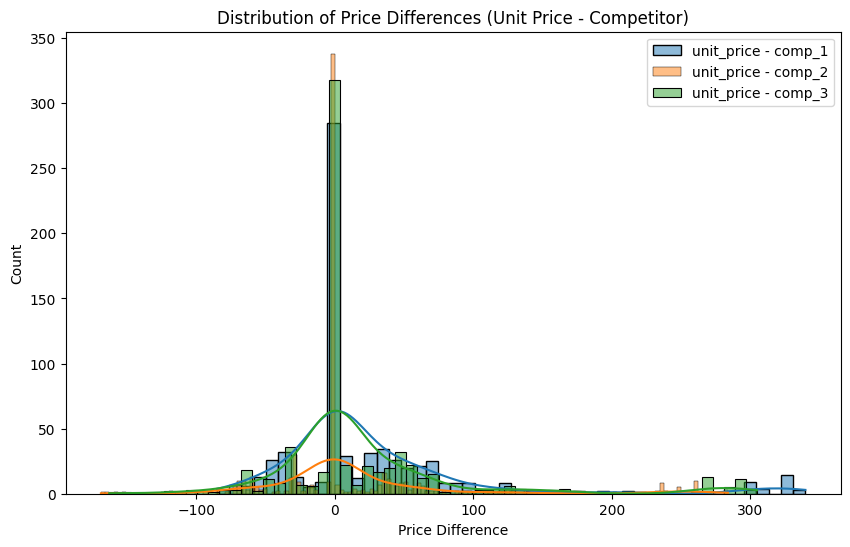

In [51]:
# Price difference features
for comp in comp_cols:
    df[f'diff_unit_{comp}'] = df['unit_price'] - df[comp]

plt.figure(figsize=(10, 6))
for comp in comp_cols:
    sns.histplot(df[f'diff_unit_{comp}'], label=f'unit_price - {comp}', kde=True)
plt.title('Distribution of Price Differences (Unit Price - Competitor)')
plt.xlabel('Price Difference')
plt.legend()
plt.show()

Monthly analysis of prices

In [59]:
monthly_df = pd.DataFrame()
monthly_df = df.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values(by='month_year')

In [60]:
monthly_df.head()

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,44,18,18
2,2017-02-01,127.827143,3584.11,217.847838,35,180,72,78
4,2017-03-01,122.586615,10204.38,282.314965,101,299,104,242
6,2017-04-01,119.288667,11524.62,335.440132,121,300,150,309
8,2017-05-01,104.785769,21843.33,393.828633,222,460,160,803


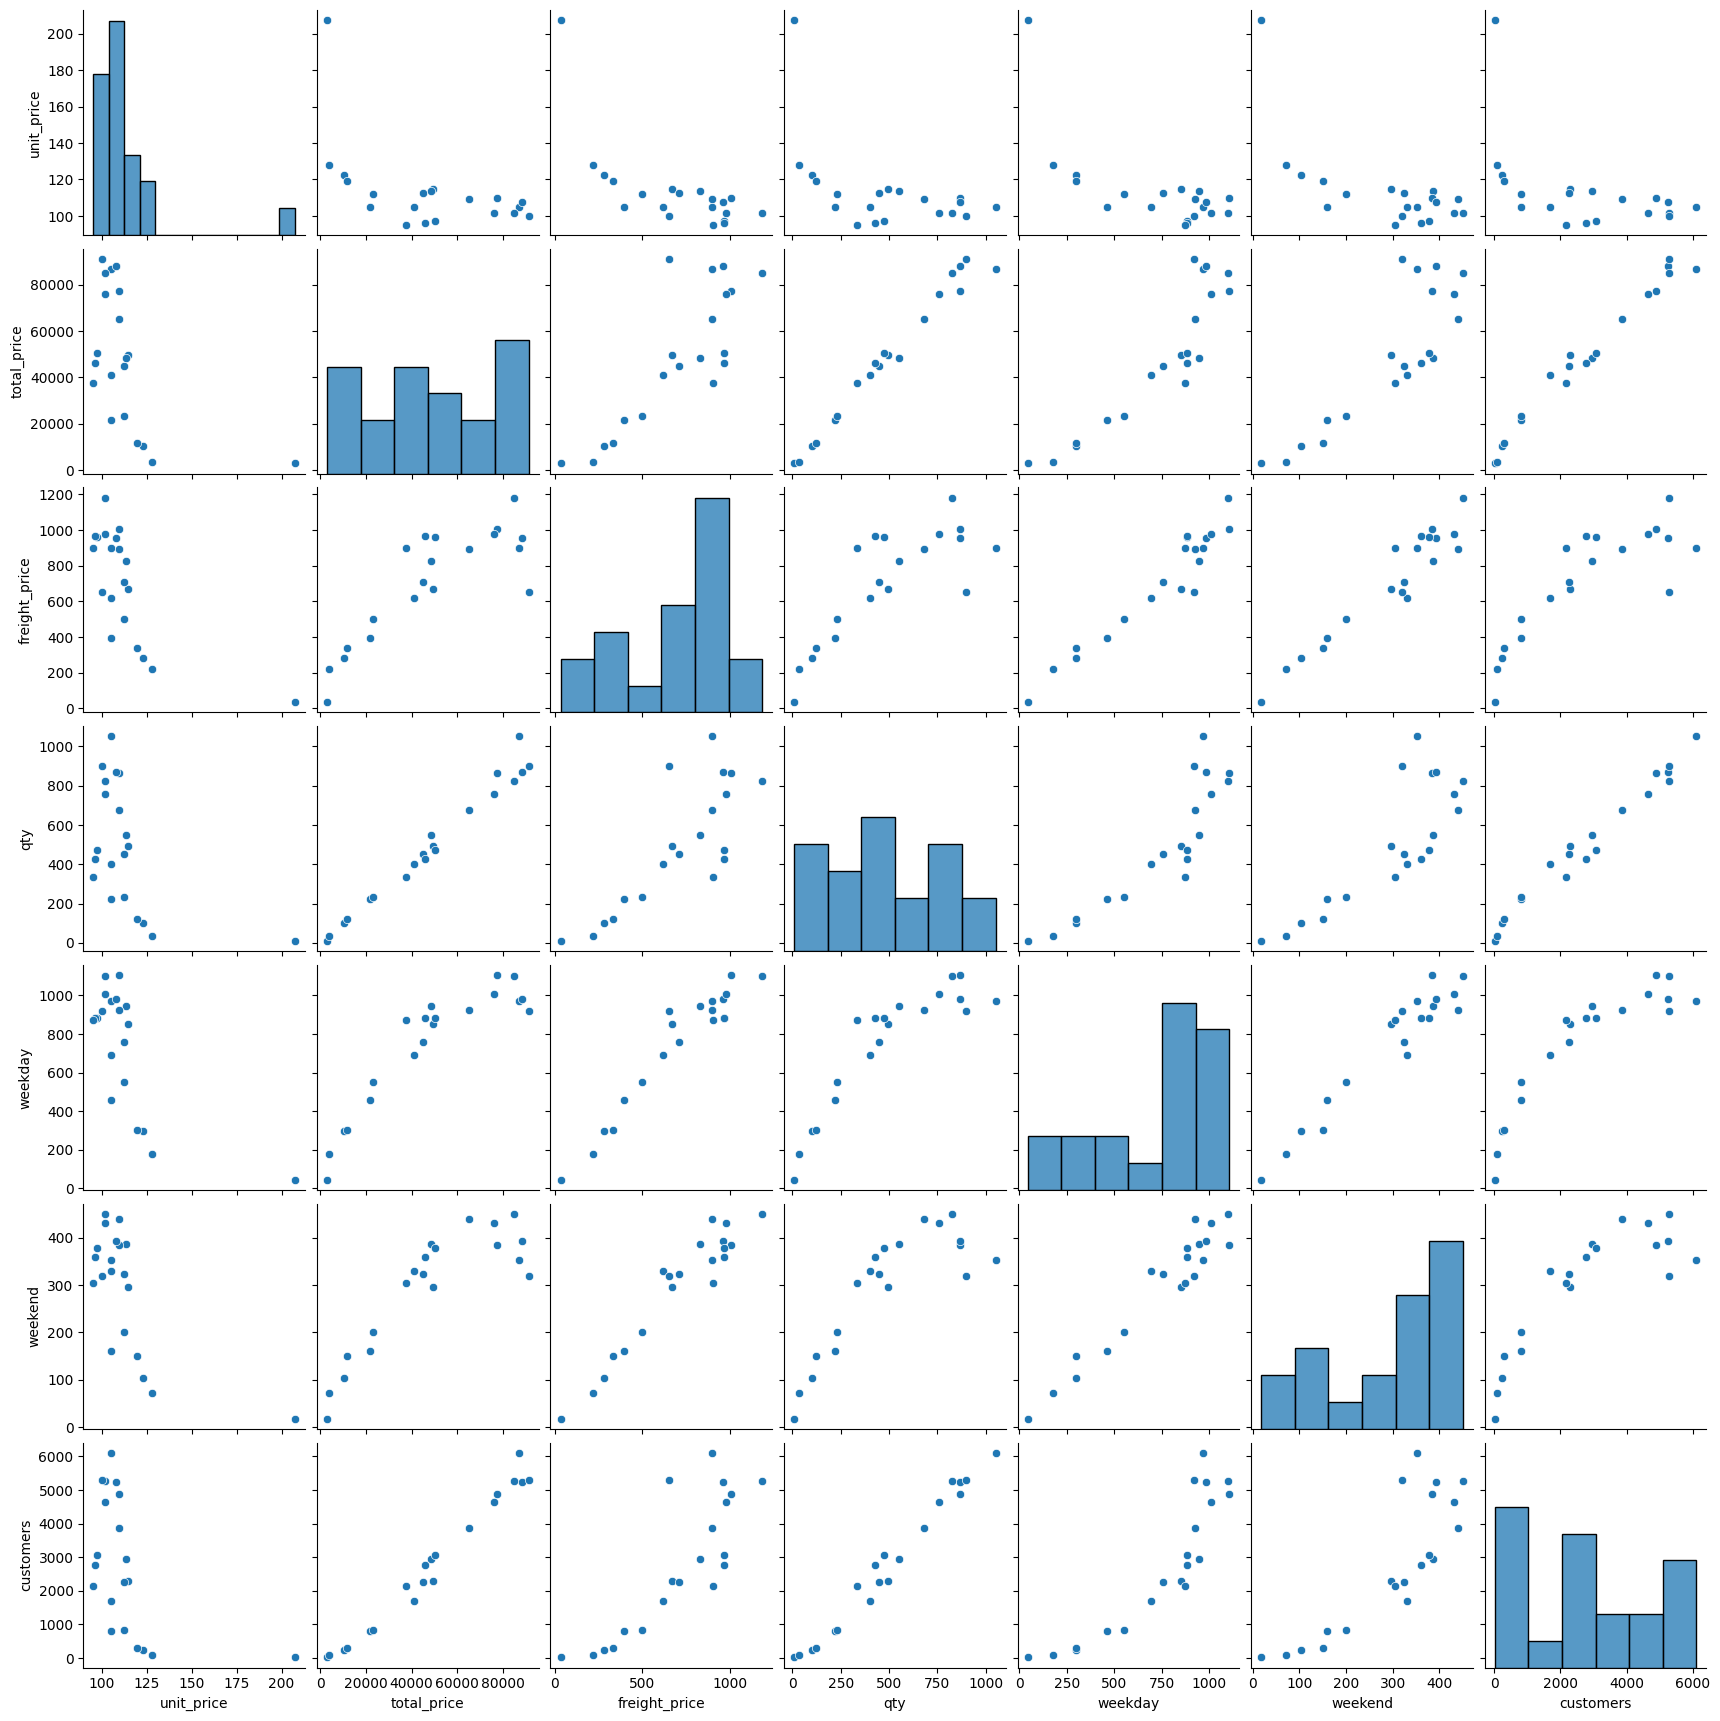

In [61]:
sns.pairplot(monthly_df.select_dtypes(include=[np.number]))
plt.show()

# Feature engineering